
# Project: Gun Data Analysis in United States

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


### Functions I used in my analysis

In [2]:
#This function takes 2 series and return them merged 
def join_series(x,y,x_title,y_title):
    """Returns a dataframe containes the merged series with custom titles"""
    return pd.concat({x_title : x, y_title : y},axis=1)
    
    

In [3]:
def drop_columns(x_list,dataframe):
    """Drops specifed columns from dataframe"""
    return dataframe.drop(dataframe.columns[x_list], axis = 1)
    
    

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_gundata = pd.read_excel("gun-data.xlsx", sheet_name="Sheet1", index_col = False)
df_gundata.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
df_gundata.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [6]:

df_gundata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

> As seen here month Dtype is object so iam going to convert it to datetime

> Will also remove columns that i will probably wont need [8 to 25] and leave other columns

In [7]:
df_gundata['state'].value_counts()

Alabama                 227
Puerto Rico             227
Nevada                  227
New Hampshire           227
New Jersey              227
New Mexico              227
New York                227
North Carolina          227
North Dakota            227
Ohio                    227
Oklahoma                227
Oregon                  227
Pennsylvania            227
Rhode Island            227
Montana                 227
South Carolina          227
South Dakota            227
Tennessee               227
Texas                   227
Utah                    227
Vermont                 227
Virgin Islands          227
Virginia                227
Washington              227
West Virginia           227
Wisconsin               227
Nebraska                227
Missouri                227
Alaska                  227
Idaho                   227
Arizona                 227
Arkansas                227
California              227
Colorado                227
Connecticut             227
Delaware            

In [8]:
#Reads the cenus data set
df_cenus = pd.read_csv("u.s.-census-data.csv")
df_cenus.head(30)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


> As seen in the cell below all are type object which need to be converted to float or int if needed

> Removing Fact Note Column since it contains alot of nan and we probably wont need it in the analysis

> Will use only the index needed (Probably population 2016 and remove the others for more easy cleaning)

In [9]:

df_cenus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    


# Data Cleaning 

### So first we are going to have a copy so we keep the orginal one and change the month column from object to datetime


In [10]:
#Makes a copie of gundata to keep original
df_gundata_v1 = df_gundata
#Changes column month from object to datetime
df_gundata_v1['month'] = pd.to_datetime(df_gundata_v1['month'])


In [11]:
df_gundata_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

### removing some columns that wont help in my research

In [12]:
#Drops specific columns from dataframe
df_gundata_v1 = drop_columns([8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],df_gundata_v1)
df_gundata_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month           12485 non-null  datetime64[ns]
 1   state           12485 non-null  object        
 2   permit          12461 non-null  float64       
 3   permit_recheck  1100 non-null   float64       
 4   handgun         12465 non-null  float64       
 5   long_gun        12466 non-null  float64       
 6   other           5500 non-null   float64       
 7   multiple        12485 non-null  int64         
 8   totals          12485 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 878.0+ KB


### filled na depending on state

>Learned about this function from : https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

In [13]:
#Fills the nulls in the dataframe according to the states not overall
df_gundata_v1["permit"] = df_gundata_v1["permit"].fillna(df_gundata_v1.groupby('state')["permit"].transform('mean'))
df_gundata_v1["permit_recheck"] = df_gundata_v1["permit_recheck"].fillna(df_gundata_v1.groupby('state')["permit_recheck"].transform('mean'))
df_gundata_v1["handgun"] = df_gundata_v1["handgun"].fillna(df_gundata_v1.groupby('state')["handgun"].transform('mean'))
df_gundata_v1["long_gun"] = df_gundata_v1["long_gun"].fillna(df_gundata_v1.groupby('state')["long_gun"].transform('mean'))
df_gundata_v1["other"] = df_gundata_v1["other"].fillna(df_gundata_v1.groupby('state')["other"].transform('mean'))

In [14]:
df_gundata_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month           12485 non-null  datetime64[ns]
 1   state           12485 non-null  object        
 2   permit          12485 non-null  float64       
 3   permit_recheck  12485 non-null  float64       
 4   handgun         12485 non-null  float64       
 5   long_gun        12485 non-null  float64       
 6   other           12485 non-null  float64       
 7   multiple        12485 non-null  int64         
 8   totals          12485 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 878.0+ KB


### The github link about this dataset mentioned there is something wrong with califionia multiple numbers so wanted to check here

### As seen below it was 0 the eniter time then pumed then zero again. Some thing is wrong lets check other states to make sure

<AxesSubplot:>

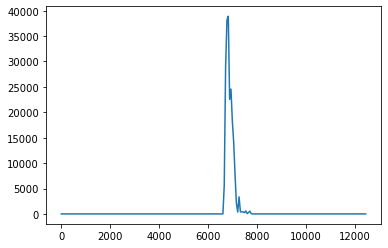

In [15]:
#Filters datasframe to california
df_gundata_v1.query('state == "California"')['multiple'].plot()

### New york multiple column seems normal

<AxesSubplot:>

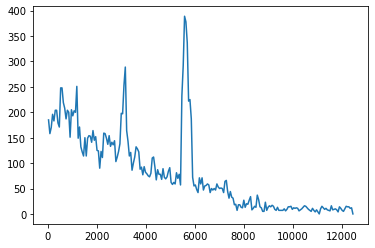

In [16]:
#Filters dataset to New York
df_gundata_v1.query('state == "New York"')['multiple'].plot()

### Also Washington seems good so only california has something wrong with it 

<AxesSubplot:>

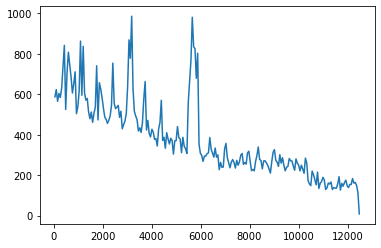

In [17]:
#Filters dataset to Washington
df_gundata_v1.query('state == "Washington"')['multiple'].plot()


### So i made all multiple number in california to zero so it wont mess up the calculations

In [18]:
#Filter by california state and changes all the values in multiple to zero
df_gundata_v1.loc[df_gundata_v1['state']  == 'California',['multiple']] = 0 
# Lets check the value count to make sure it worked
# Show value counts for california in multiple
df_gundata_v1.query('state ==  "California"')['multiple'].value_counts()

0    227
Name: multiple, dtype: int64

### In cenus dataset I removed fact note Column because we wont need it

In [19]:
#Drops a column in cenus dataframe we wont use
df_cenus = drop_columns([1],df_cenus)

In [20]:
df_cenus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 non-null     object
 18  Louisiana   

### Kept only the first index for population of 2016 because thats the only thing we need for our question

In [21]:
#Take the first index in cenus ( Which is population 2016) and take a copy of it 
df_cenus_v1 = df_cenus.loc[0]
df_cenus_v1

Fact              Population estimates, July 1, 2016,  (V2016)
Alabama                                              4,863,300
Alaska                                                 741,894
Arizona                                              6,931,071
Arkansas                                             2,988,248
California                                          39,250,017
Colorado                                             5,540,545
Connecticut                                          3,576,452
Delaware                                               952,065
Florida                                             20,612,439
Georgia                                             10,310,371
Hawaii                                               1,428,557
Idaho                                                1,683,140
Illinois                                            12,801,539
Indiana                                              6,633,053
Iowa                                                 3,

### If we remember all data in cenus dataset is in object form so iam going to removed commas from numbers and converted string to float

In [22]:
#Replace all , in cenus to none so we can convert to float 
df_cenus_v2 = df_cenus_v1[1:].str.replace(',','').astype(float)

In [23]:
df_cenus_v2

Alabama            4863300.0
Alaska              741894.0
Arizona            6931071.0
Arkansas           2988248.0
California        39250017.0
Colorado           5540545.0
Connecticut        3576452.0
Delaware            952065.0
Florida           20612439.0
Georgia           10310371.0
Hawaii             1428557.0
Idaho              1683140.0
Illinois          12801539.0
Indiana            6633053.0
Iowa               3134693.0
Kansas             2907289.0
Kentucky           4436974.0
Louisiana          4681666.0
Maine              1331479.0
Maryland           6016447.0
Massachusetts      6811779.0
Michigan           9928300.0
Minnesota          5519952.0
Mississippi        2988726.0
Missouri           6093000.0
Montana            1042520.0
Nebraska           1907116.0
Nevada             2940058.0
New Hampshire      1334795.0
New Jersey         8944469.0
New Mexico         2081015.0
New York          19745289.0
North Carolina    10146788.0
North Dakota        757952.0
Ohio          

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 : Is high population assosiated with high gun sales ? 

In [24]:
#Take a copy of gundata again 
df_gundata_v2 = df_gundata_v1

### The best way to calculate the total weapon sales is for Each long gun and handgun check will count as 1.1 sales. Each multiple-gun check will count as two sales.


>based on an articl and github : https://github.com/nytimes/gunsales#getting-gun-sales-estimates-from-background-checks


In [25]:
#Take the value of handgun and long gun and multiple them by 1.1,  multiply multiple column  by 2 
#Then add them to total_sales column
hand_and_long = (df_gundata_v1['handgun'] + df_gundata_v1['long_gun']) * 1.1
multiple = df_gundata_v1['multiple'] * 2
df_gundata_v2['total_sales'] = (hand_and_long ) + (multiple)

### First Lets see the gun sales over the year

<AxesSubplot:xlabel='month'>

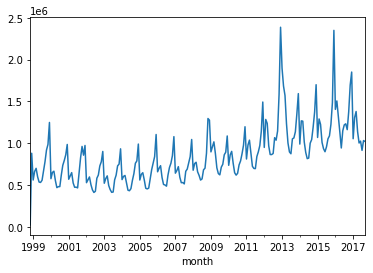

In [26]:
#group the dataset by dates 
df_gundata_v2.groupby('month')['total_sales'].sum().plot(kind = 'line')

### We can see its increasing with almost each year

### Now lets check the Total sales for each state

<AxesSubplot:title={'center':'Total Sales for each state'}, xlabel='state'>

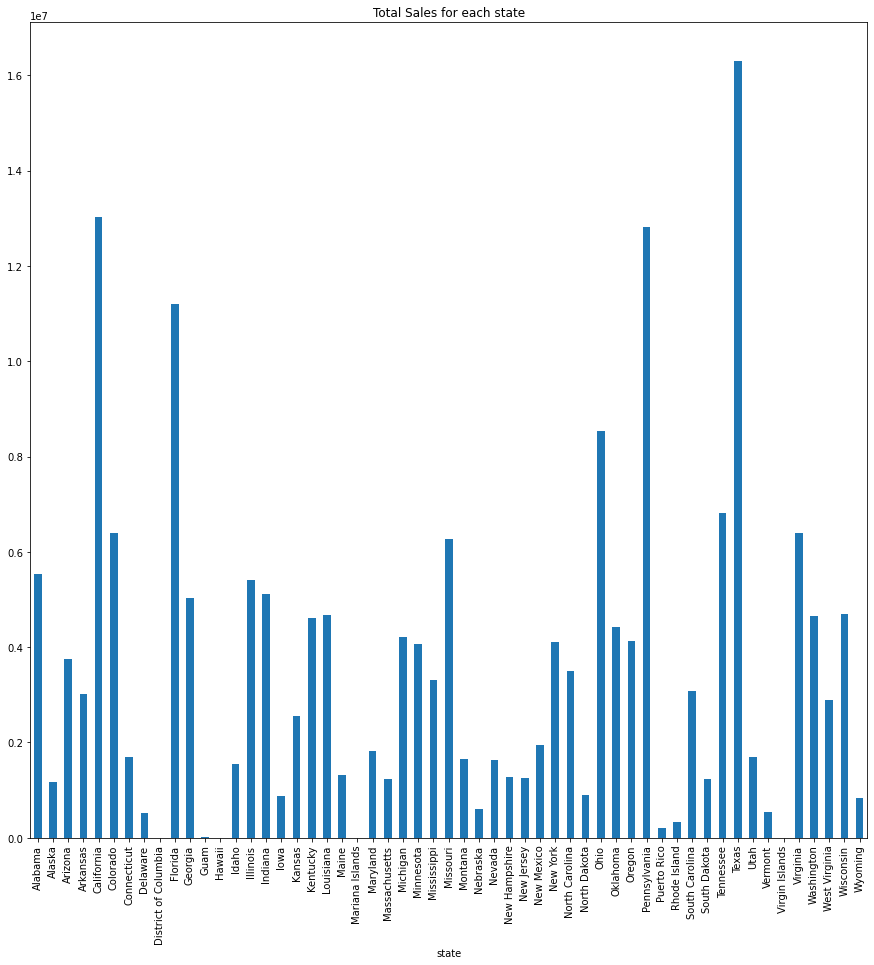

In [27]:
#group the dataset by state and show total sales column total sum for each state
df_gundata_v2.groupby('state')['total_sales'].sum().plot(kind = 'bar',figsize =(15,15), title = "Total Sales for each state")

### We can see that texas and california are the top states in total sales

### Lets check now the Population for each state 2016 and see if texas has higher population than california

<AxesSubplot:title={'center':'Population for each state in 2016'}>

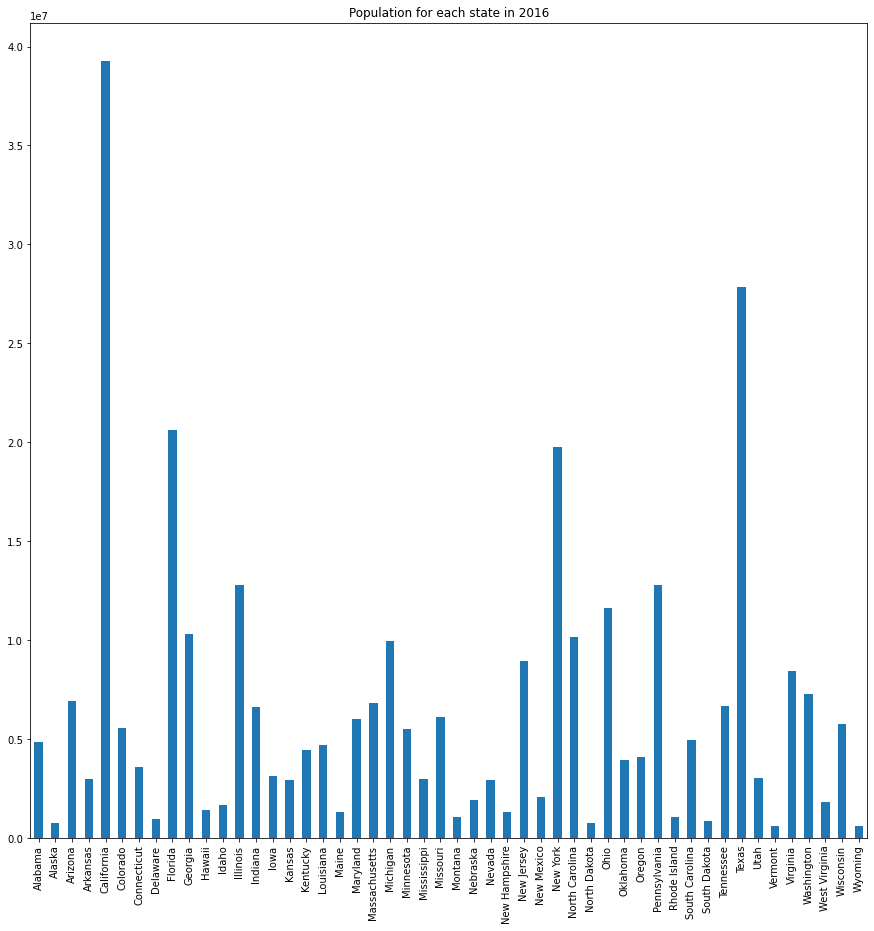

In [28]:

df_cenus_v2.plot(kind = 'bar',figsize =(15,15),title = "Population for each state in 2016")

### As we can see texas has lower population than california but higher sales. Also pennsylvania had a very high sale with lower population compared to these too 

### So lets start the analysis and  here i will combine the total sales series with population 2016 series to see difference between them

>Learned about this function here : https://sparkbyexamples.com/pandas/pandas-combine-two-series-into-dataframe/

In [29]:
#group the dataframe by state and filter total sales total sums for each state
gun = df_gundata_v2.groupby('state')['total_sales'].sum()
#Take a copy of cenud dataframe
cenus = df_cenus_v2
#Using the function made at the top of this notebook : it mergs the two series to make a dataframe of them with custom titles 
df = join_series(gun,cenus,'Population','Total Sale')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Alabama to Wyoming
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  55 non-null     float64
 1   Total Sale  50 non-null     float64
dtypes: float64(2)
memory usage: 1.3+ KB


### When I checked there are 5 countries missing from Cenus so i just droped them

In [30]:
#Drops null values row in dataset
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  50 non-null     float64
 1   Total Sale  50 non-null     float64
dtypes: float64(2)
memory usage: 1.2+ KB


### Lets check everything is fine in the new customized dataset

In [31]:
data 

,Population,Total Sale
Alabama,5543332.6,4863300.0
Alaska,1165261.6,741894.0
Arizona,3758411.0,6931071.0
Arkansas,3015562.0,2988248.0
California,13032415.0,39250017.0
Colorado,6393642.5,5540545.0
Connecticut,1685139.6,3576452.0
Delaware,511916.4,952065.0
Florida,11198350.2,20612439.0
Georgia,5034571.3,10310371.0


### As we see below here High population doesnt always result to high sales  compares to its population and vice verse

>Like california Very high population and low gun sales compared to pennsylVania and texes lower Population than california but higher Sales

<AxesSubplot:title={'center':'2016 population with total gun sales'}>

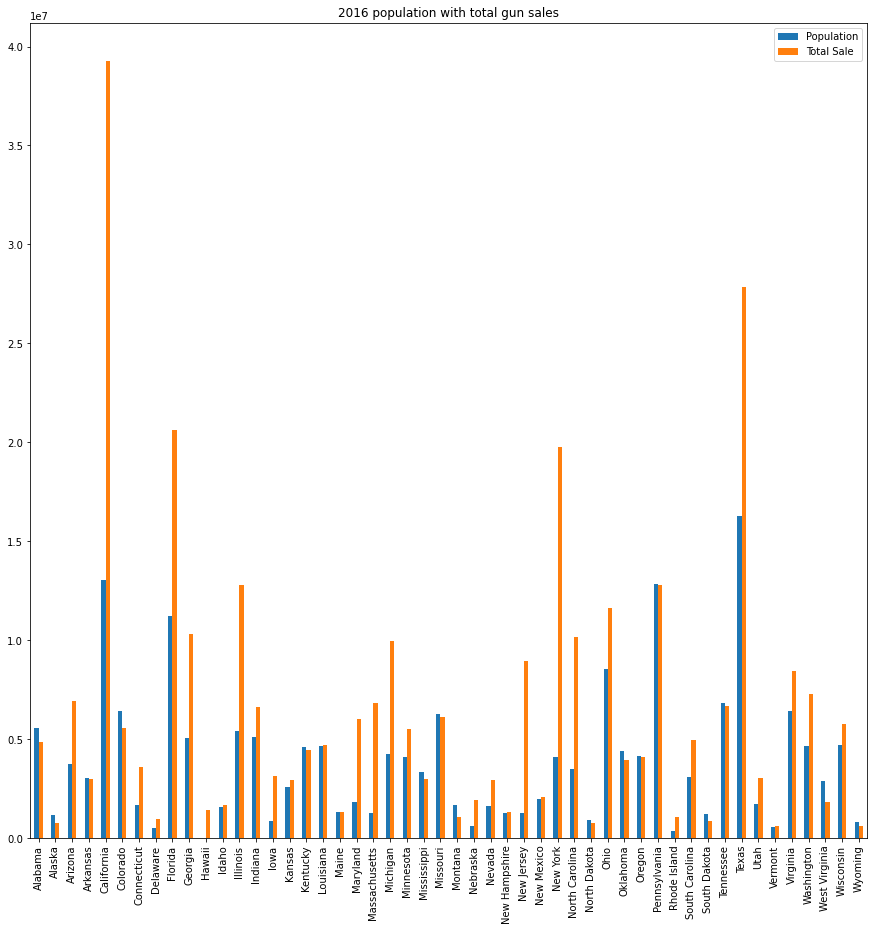

In [32]:

data.plot(kind = 'bar', figsize = (15,15), title = '2016 population with total gun sales')

### In total there is a good corellation between them

In [33]:
data.corr()

,Population,Total Sale
Population,1.000000,0.817189
Total Sale,0.817189,1.000000


### So now lets get the mean of population and divide the group into two. The high pop and low pop and lets see the total sales mean

In [34]:
#Get the mean of column population and save it 
data_mean = data['Population'].mean()
data_mean

3892302.898

In [35]:
#Filter dataset with populations equal or bigger than the population mean
data.query('Population >= {}'.format(data_mean))

,Population,Total Sale
Alabama,5543332.6,4863300.0
California,13032415.0,39250017.0
Colorado,6393642.5,5540545.0
Florida,11198350.2,20612439.0
Georgia,5034571.3,10310371.0
Illinois,5411526.4,12801539.0
Indiana,5121969.6,6633053.0
Kentucky,4613297.9,4436974.0
Louisiana,4668995.5,4681666.0
Michigan,4223197.8,9928300.0


In [36]:
#Filter dataset with populations lower than the population mean
data.query('Population < {}'.format(data_mean))

,Population,Total Sale
Alaska,1165261.6,741894.0
Arizona,3758411.0,6931071.0
Arkansas,3015562.0,2988248.0
Connecticut,1685139.6,3576452.0
Delaware,511916.4,952065.0
Hawaii,45.8,1428557.0
Idaho,1552361.3,1683140.0
Iowa,873317.8,3134693.0
Kansas,2557986.4,2907289.0
Maine,1321707.2,1331479.0


### So After analysis we can say by confidence that high population do results in more sales than low population on average but there can be rare case

Text(0, 0.5, 'Total Sale Mean')

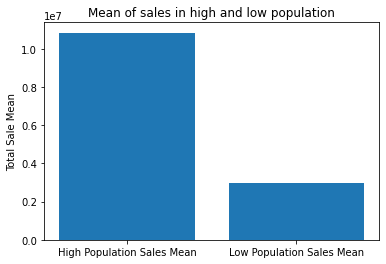

In [37]:
#Gets the mean of high population
data_high = data.query('Population >= {}'.format(data_mean))['Total Sale'].mean()
#Gets the mean of low population
data_low = data.query('Population < {}'.format(data_mean))['Total Sale'].mean()
#Then plot it to show visual 
locations = [1,2]
heights = [data_high,data_low]
labels = ['High Population Sales Mean','Low Population Sales Mean']
plt.bar(locations, heights, tick_label=labels)
plt.title('Mean of sales in high and low population')
plt.ylabel("Total Sale Mean")

## Question 2 : Which states had the highest growth rate from year 2000

### So we start by filtering and total check from year 2000 and 2016

In [38]:
#Filter gun dataset to year 2000,and show total check sum for each state
total_checks_2000 = df_gundata_v2[df_gundata_v2['month']=='2000'].groupby('state')['totals'].sum()
#Filter gun dataset to year 2016,and show total check sum for each state
total_checks_2016 = df_gundata_v2[df_gundata_v2['month']=='2016'].groupby('state')['totals'].sum()
#Merge the 2 series into a dataset with customized titles
data_2000_2016 = join_series(total_checks_2000,total_checks_2016,'total_checks_2000','total_checks_2016')
data_2000_2016


,total_checks_2000,total_checks_2016
state,,
Alabama,17860,73218
Alaska,2149,6085
Arizona,12192,31910
Arkansas,12592,20437
California,57800,220912
Colorado,23614,48214
Connecticut,7661,31712
Delaware,1057,4886
District of Columbia,4,82


### Now here we assign it to variables and calculate the increase percentage

In [39]:
#Takes a copy of eash dataset
v_2016 = data_2000_2016['total_checks_2016']
v_2000 = data_2000_2016['total_checks_2000']
#Calculate percentage increase from year 2000 to 2016
data_2000_2016['increase_percentange'] = ((v_2016 - v_2000) / v_2000) * 100
data_2000_2016

,total_checks_2000,total_checks_2016,increase_percentange
state,,,
Alabama,17860,73218,309.955207
Alaska,2149,6085,183.154956
Arizona,12192,31910,161.729003
Arkansas,12592,20437,62.301461
California,57800,220912,282.200692
Colorado,23614,48214,104.175489
Connecticut,7661,31712,313.940739
Delaware,1057,4886,362.251656
District of Columbia,4,82,1950.000000


### Now lets see the Growth rate for each state to check the overall growth

> Here we filtered total checks to be bigger than 0 to avoid infinity 

<AxesSubplot:title={'center':'Total check for each state 2016'}, xlabel='state', ylabel='Percentage %'>

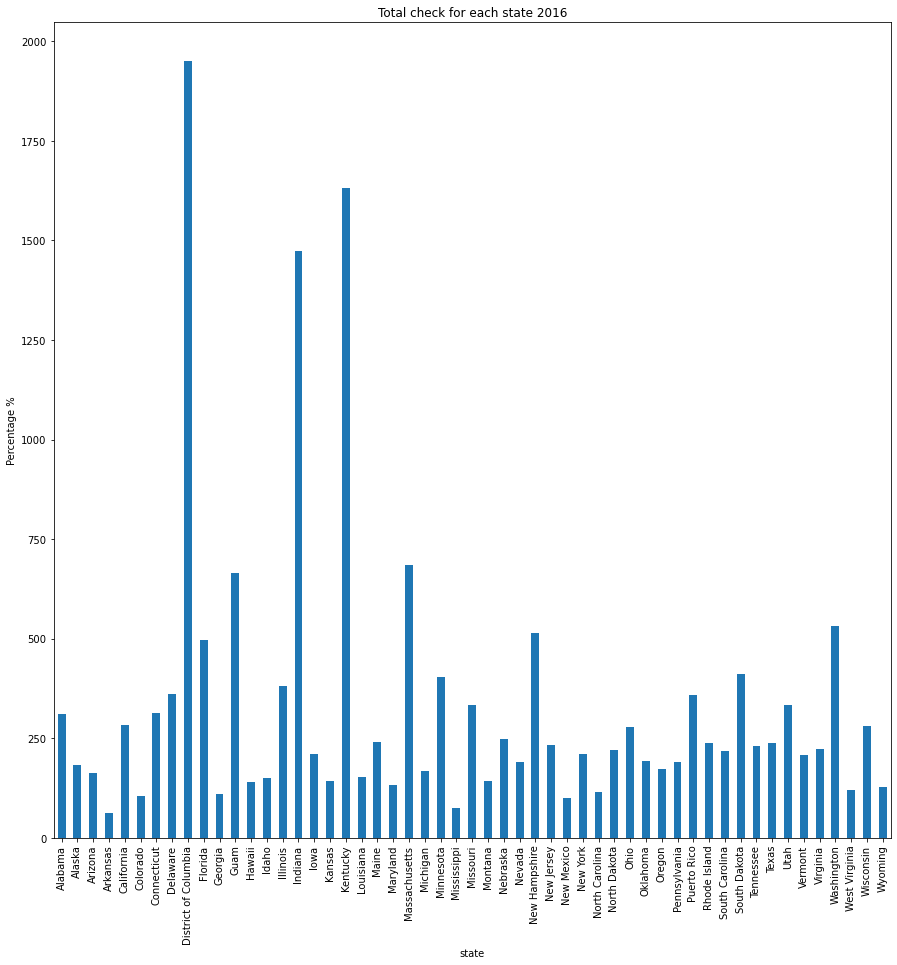

In [40]:
#filter 0 values in year 200 to avoid infinite and plot the increased percentage for each state
data_2000_2016.query('total_checks_2000 > 0')['increase_percentange'].plot(kind = 'bar', figsize = (15,15),title = "Total check for each state 2016" , ylabel = "Percentage %")

### We can see some states has a very high growth rate from year 2000
### Now lets get the the growth mean and show the highest states that changed from 2000

In [41]:
#Get Mean of total increase percentage
growth_mean = data_2000_2016.query('total_checks_2000 > 0')['increase_percentange'].mean()
growth_mean

332.95037088834647

In [42]:
#Filter states with thier increase percentage bigger or equal to the mean
highchange = data_2000_2016.query('increase_percentange >= {}'.format(growth_mean))
highchange

,total_checks_2000,total_checks_2016,increase_percentange
state,,,
Delaware,1057,4886,362.251656
District of Columbia,4,82,1950.000000
Florida,21069,125935,497.726518
Guam,23,176,665.217391
Illinois,39273,189400,382.265169
Indiana,14663,230892,1474.657301
Kentucky,17459,302383,1631.960593
Mariana Islands,0,3,inf
Massachusetts,2578,20208,683.863460


### As we can see below these are the states with the highest increase percentage from year 2000 to 2016

<AxesSubplot:title={'center':'Highest growth gun registration since 2000 - 2016'}, xlabel='state', ylabel='Growth percent %'>

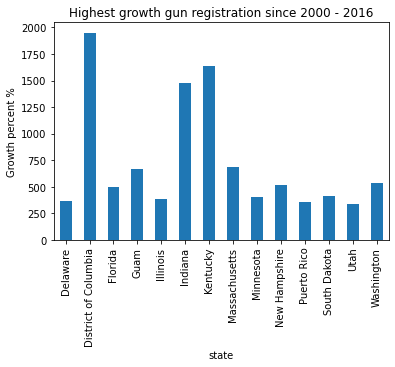

In [43]:
#Plot the high increase percentage states
highchange.query('total_checks_2000 > 0')['increase_percentange'].plot(kind = 'bar',title = "Highest growth gun registration since 2000 - 2016", ylabel = "Growth percent %")

### Now lets check the highest state in increased percentage 

In [44]:
#Index of the state with max percentage
data_2000_2016.query('total_checks_2000 > 0')['increase_percentange'].idxmax()


'District of Columbia'

### How much they increase by

In [45]:
# District of Columbia checks increases by 1950 % since 2000
data_2000_2016.query('total_checks_2000 > 0')['increase_percentange'].max()

1950.0

## Question 3 : What is the trend of gun sales recently ?

### Lets start and see the overall gun sales for each type over the years

In [46]:
#Group by month and show guns data
df_gundata_v2.groupby('month')[['handgun','long_gun','other']].sum()

,handgun,long_gun,other
month,,,
1998-11-01,6859.000000,11909.000000,19825.94
1998-12-01,213141.142202,570882.834862,19825.94
1999-01-01,184497.142202,309915.834862,19825.94
1999-02-01,232449.142202,352411.834862,19825.94
1999-03-01,241037.142202,376775.834862,19825.94
...,...,...,...
2017-05-01,552018.000000,328157.000000,29372.00
2017-06-01,569149.000000,331152.000000,29730.00
2017-07-01,480124.000000,322264.000000,26898.00


### As seen below Long_gun were more populare back in the day but recently the handguns are higher than long_gun

<AxesSubplot:title={'center':'Gun sales 1998 - 2017'}, xlabel='month', ylabel='Million '>

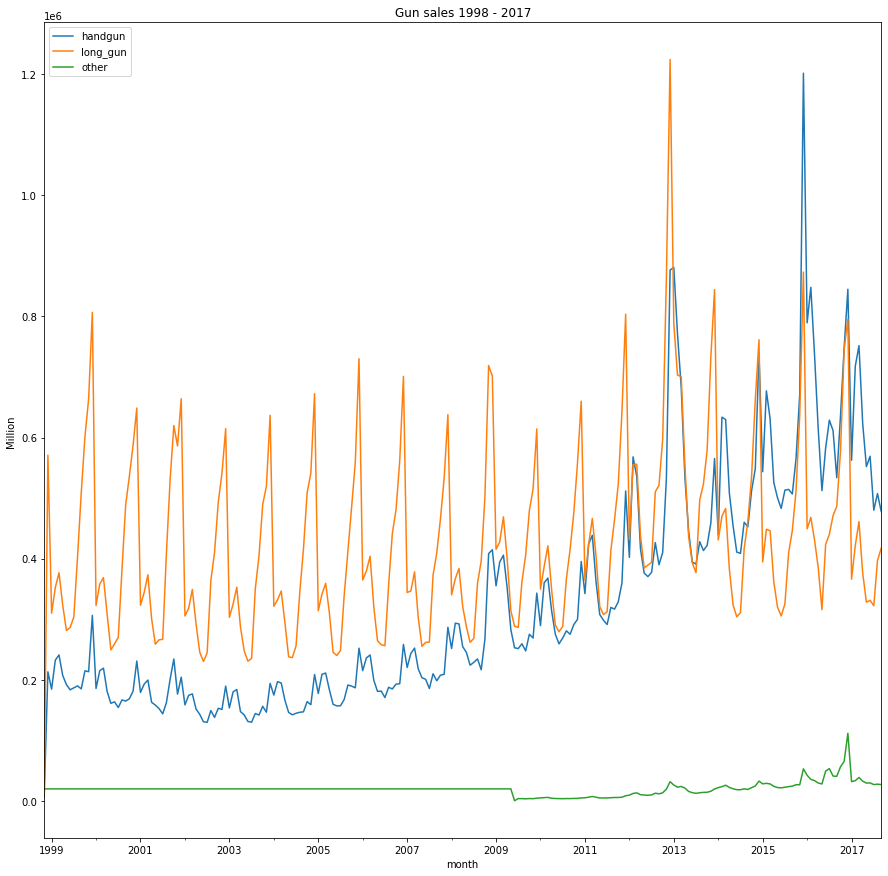

In [47]:
#show the gun sales total for each year
df_gundata_v2.groupby('month')[['handgun','long_gun','other']].sum().plot(kind = 'line',figsize =(15,15), title = "Gun sales 1998 - 2017", ylabel = "Million ")

### Lets now check only the recent year sales to check the trend

In [48]:
#Filter by year 2016
gundata2016 = df_gundata_v2.query('month == 2016')

### As seen below it seems the handguns sale is the highest in year 2016 by far

<AxesSubplot:title={'center':'Gun sales for 2016'}>

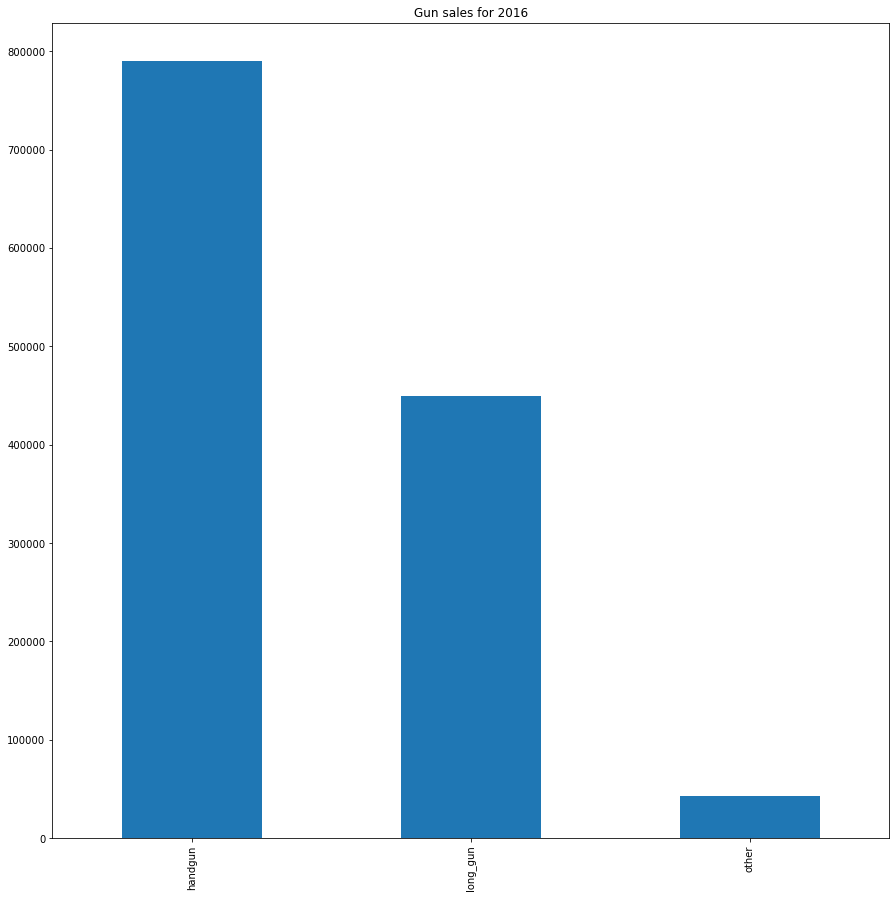

In [49]:
gundata2016[['handgun','long_gun','other']].sum().plot(kind = 'bar',figsize =(15,15), title = "Gun sales for 2016")

### Lets check if most of the states agree to the trend of handguns

<AxesSubplot:title={'center':'Gun sales for 2016 for each state'}, xlabel='state'>

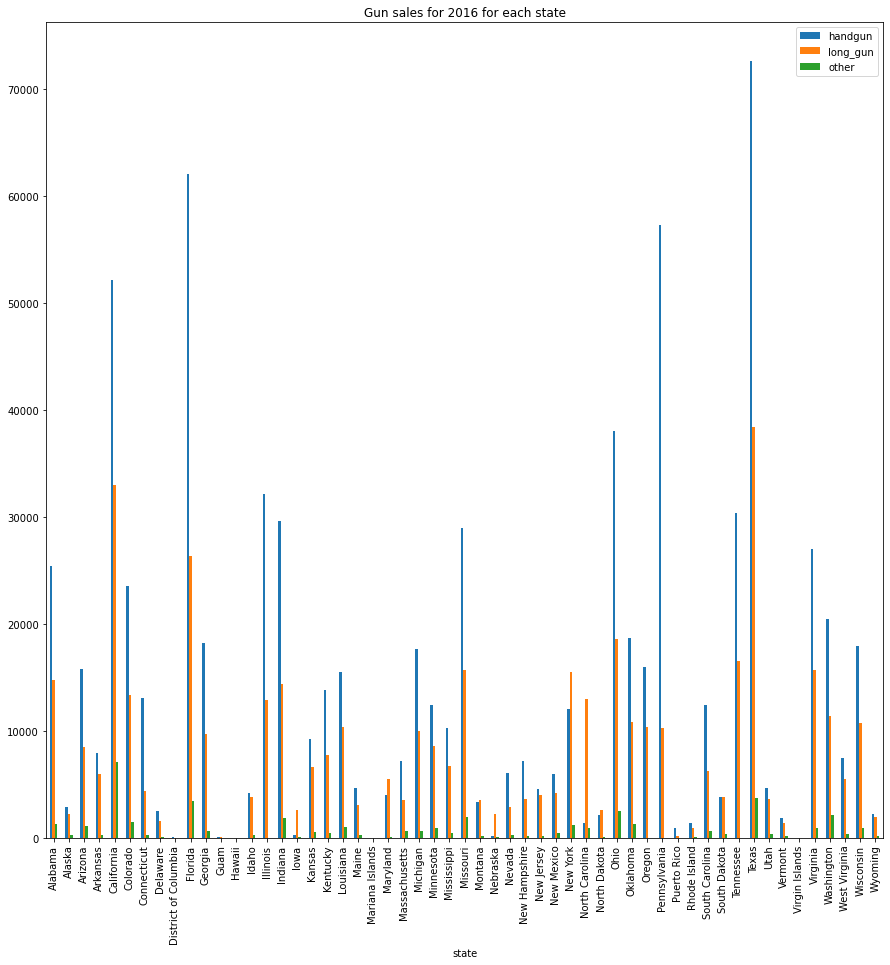

In [50]:
gundata2016.groupby('state')[['handgun','long_gun','other']].sum().plot(kind = 'bar',figsize =(15,15), title = "Gun sales for 2016 for each state")

### Just to make sure lets also check guns total sale for 2017 and see if its the same

<AxesSubplot:title={'center':'Gun sales for 2017'}>

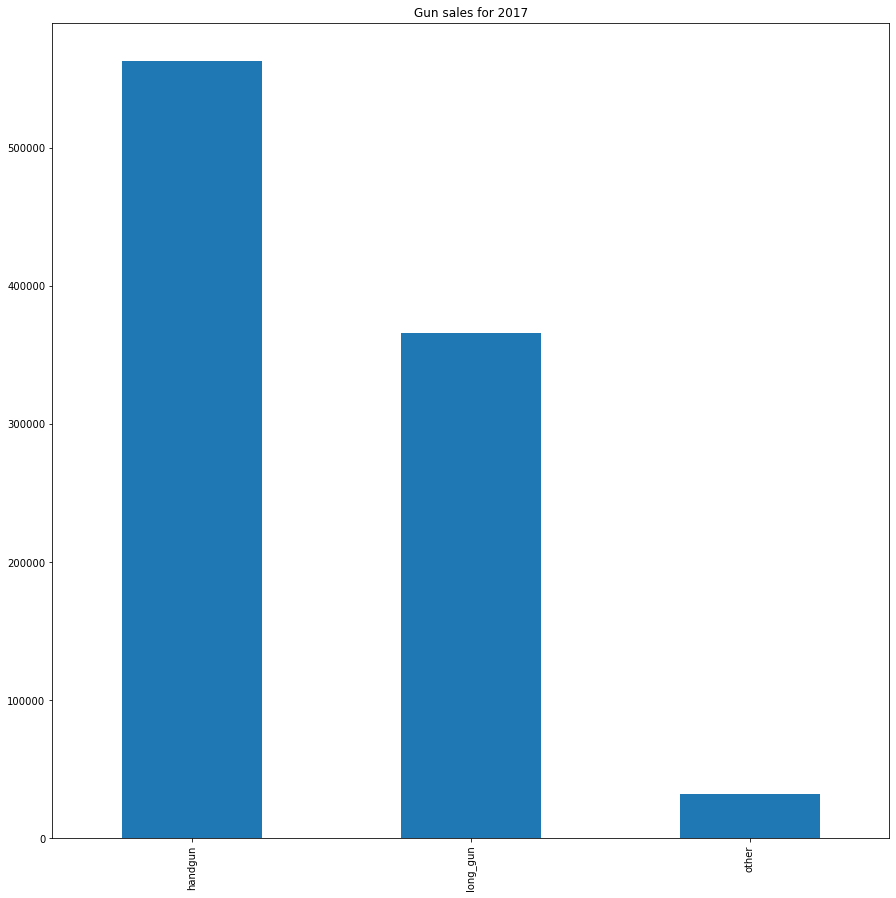

In [51]:
#Filter dataset by year 2017
gundata2017 = df_gundata_v2.query('month == 2017')
gundata2017[['handgun','long_gun','other']].sum().plot(kind = 'bar',figsize =(15,15),title = "Gun sales for 2017")

### As seen below almost the same result as 2016 so hand guns is definitly the trend in the recent years

<AxesSubplot:title={'center':'Gun sales for 2017 for each state'}, xlabel='state'>

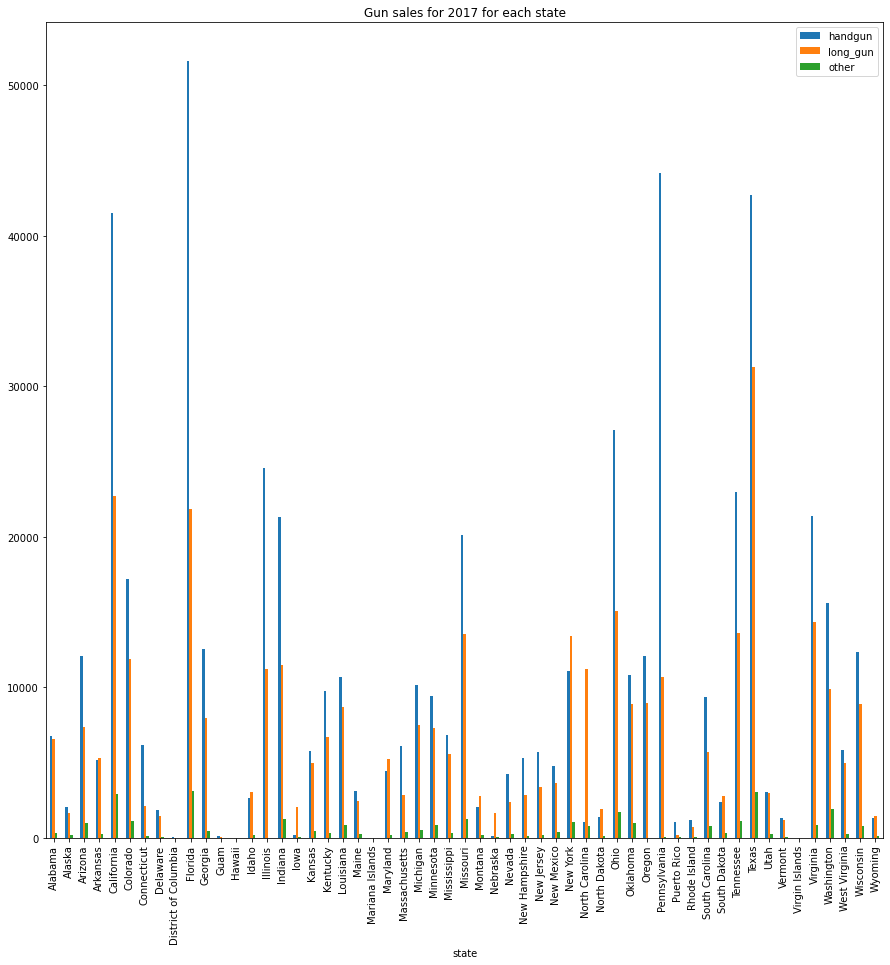

In [52]:
gundata2017.groupby('state')[['handgun','long_gun','other']].sum().plot(kind = 'bar',figsize =(15,15),title = "Gun sales for 2017 for each state")

### We can clearly see that handguns is the trend now in the past years

### A bonus thing we can do is to see at which year did the handguns and longuns total sales meet to see where did the trend start to change

### Lets gather handgun sales over the years with long guns sales


In [53]:
#filter dataset by time and show total handgun sales
handguns_total = df_gundata_v2.groupby("month")['handgun'].sum()
handguns_total

month
1998-11-01      6859.000000
1998-12-01    213141.142202
1999-01-01    184497.142202
1999-02-01    232449.142202
1999-03-01    241037.142202
                  ...      
2017-05-01    552018.000000
2017-06-01    569149.000000
2017-07-01    480124.000000
2017-08-01    507489.000000
2017-09-01    478082.000000
Name: handgun, Length: 227, dtype: float64

In [54]:
#filter dataset by time and show total long guns sales
longguns_total = df_gundata_v2.groupby("month")['long_gun'].sum()
longguns_total

month
1998-11-01     11909.000000
1998-12-01    570882.834862
1999-01-01    309915.834862
1999-02-01    352411.834862
1999-03-01    376775.834862
                  ...      
2017-05-01    328157.000000
2017-06-01    331152.000000
2017-07-01    322264.000000
2017-08-01    396950.000000
2017-09-01    417305.000000
Name: long_gun, Length: 227, dtype: float64

In [55]:
#Merges the two series into a dataset with custom titles
datacomp = join_series(handguns_total,longguns_total,'handguns','long_guns')
datacomp

,handguns,long_guns
month,,
1998-11-01,6859.000000,11909.000000
1998-12-01,213141.142202,570882.834862
1999-01-01,184497.142202,309915.834862
1999-02-01,232449.142202,352411.834862
1999-03-01,241037.142202,376775.834862
...,...,...
2017-05-01,552018.000000,328157.000000
2017-06-01,569149.000000,331152.000000
2017-07-01,480124.000000,322264.000000


### Now lets add a column can calulate the difference to see which at what year was the sale the closest

In [56]:
#Subtract long guns from hands guns
datacomp['diff'] = datacomp['handguns'] - datacomp['long_guns']
datacomp

,handguns,long_guns,diff
month,,,
1998-11-01,6859.000000,11909.000000,-5050.000000
1998-12-01,213141.142202,570882.834862,-357741.692661
1999-01-01,184497.142202,309915.834862,-125418.692661
1999-02-01,232449.142202,352411.834862,-119962.692661
1999-03-01,241037.142202,376775.834862,-135738.692661
...,...,...,...
2017-05-01,552018.000000,328157.000000,223861.000000
2017-06-01,569149.000000,331152.000000,237997.000000
2017-07-01,480124.000000,322264.000000,157860.000000


### And Change the negative to postive so we can check the data

In [57]:
#Change all negative value (less than zero) to postive
datacomp[datacomp < 0] = datacomp * -1
datacomp

,handguns,long_guns,diff
month,,,
1998-11-01,6859.000000,11909.000000,5050.000000
1998-12-01,213141.142202,570882.834862,357741.692661
1999-01-01,184497.142202,309915.834862,125418.692661
1999-02-01,232449.142202,352411.834862,119962.692661
1999-03-01,241037.142202,376775.834862,135738.692661
...,...,...,...
2017-05-01,552018.000000,328157.000000,223861.000000
2017-06-01,569149.000000,331152.000000,237997.000000
2017-07-01,480124.000000,322264.000000,157860.000000


### After cleaning the dataset lets get at what year did the both guns sales almost matched by seeing the min value in the difference between handguns and long guns

In [58]:
#Bring index of the min in diff column
datacomp['diff'].idxmin()

Timestamp('2011-02-01 00:00:00')

### the difference value with

In [59]:
#Bring the min value  in diff column
datacomp['diff'].min()

583.0

### The trend started changing at 2011-02-01 supposedly So lets make a plot at that year and check the total hand gun sales and long gun sales

<AxesSubplot:title={'center':'2011-02-1 gun sales'}>

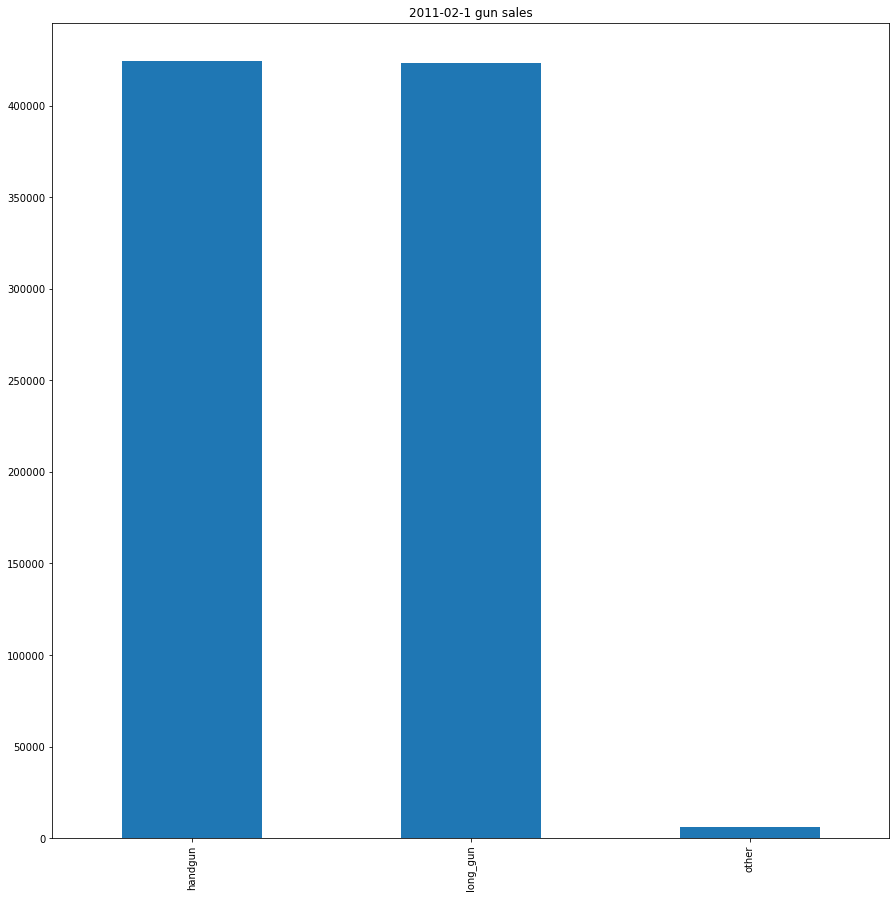

In [60]:
#filter time by 2011-02-01
df_gundata_v2.query('month == "2011-02-01"')[['handgun','long_gun','other']].sum().plot(kind = 'bar',figsize =(15,15),title = "2011-02-1 gun sales")

### We can see that  they were almost identical at that year maybe something intresting happened that year

<a id='conclusions'></a>
# Conclusions


### After deep analysis we answer our three questions and provided data to prove it. 

### For Question 1 : Is high population assosiated with high gun sales ? 

So we concluded that yes High population do result in more gun sales (Using the total gun sale equation from githun and article). Yes there can rare cases like Pennsyl vania has lower population than New York but higher sale but on average more population cause more sales. Additional reserches that would prove usefull is to see and check why these low population state have higher gun sales compared to other statesand Whats unique about them. 

## Question 2 : Which states had the highest growth in gun checks rate from year 2000

We provided data and showed the states with the most growth percent in gun checks from year 2000 to 2016 with the highest one being District of columbia. Note that stwo states had 0 gun checks on year 2000 so we filtered them out to avoid infinite.

## Question 3 : What is the trend of gun sales recently ?

We can say with absolute confidence that hands guns is the trend of recent years. Long guns were more populare back in the days but after checking the recent years it is clear that handgun sales has risen over long guns and became trend in almost all the states. Additional reserches that we could do is to see what turned this trend from long guns to hand guns at year 2011 and how can we predict such change in the future. 

## Limitations I Faced

According to the github all these gun data are without the private gun sale data and that would have been helpfull to make a more accurate analysis.

The data in cenus dataframe are all objects and was so confusing at first look had to look deeper to understand the data in it.

No population data for all the years only 2010 and 2016. If we had them we could have had a cleaner look and compare between guns sales and population raise in each year and make more accurate and helpfull conclusion.

The weird values of the multiple column for california. The multiple values were 0 for a while then pump then zero again so had to exclude them.

Lastly filling the nulls in the dataset according to each state was confusing for me at first but after reading and searching up the topic I learned and finally implemented it in my analysis.

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295